In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset
file_path = "synthetic_earthquake_data_v2.csv"  # Replace with the actual file path if needed
df = pd.read_csv(file_path)

In [3]:
df.shape

(2000, 10)

In [4]:
# Display the first few rows of the dataset
print(df.head())

    Latitude   Longitude    Depth_km Tectonic_Plate_Region  \
0 -22.582779  -85.785954   59.403572               Pacific   
1  81.128575  -91.087632  114.588268               Pacific   
2  41.758910  146.251649   99.945098              Eurasian   
3  17.758527  -90.163368   11.698233        South American   
4 -61.916645  -82.098099   11.314544        South American   

  Seismic_Activity_Level  Foreshock_Count  Aftershock_Count  \
0               Moderate                1                 4   
1                   High                3                 5   
2                    Low                3                 4   
3                   High                3                 5   
4                    Low                2                 1   

   Energy_Released_Joules   Fault_Type  Magnitude  
0            1.052926e+15       Normal   7.961364  
1            1.336785e+15  Strike-slip   4.296760  
2            3.955798e+14       Normal   8.833360  
3            7.035276e+14       Normal  

In [5]:
# Check basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                2000 non-null   float64
 1   Longitude               2000 non-null   float64
 2   Depth_km                2000 non-null   float64
 3   Tectonic_Plate_Region   2000 non-null   object 
 4   Seismic_Activity_Level  2000 non-null   object 
 5   Foreshock_Count         2000 non-null   int64  
 6   Aftershock_Count        2000 non-null   int64  
 7   Energy_Released_Joules  2000 non-null   float64
 8   Fault_Type              2000 non-null   object 
 9   Magnitude               2000 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 156.4+ KB
None


In [6]:
df.dropna(inplace=True)

In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Latitude                  0
Longitude                 0
Depth_km                  0
Tectonic_Plate_Region     0
Seismic_Activity_Level    0
Foreshock_Count           0
Aftershock_Count          0
Energy_Released_Joules    0
Fault_Type                0
Magnitude                 0
dtype: int64


In [8]:
print(df['Tectonic_Plate_Region'].nunique())

6


In [9]:
df = pd.get_dummies(df, columns=['Tectonic_Plate_Region'], drop_first=True)

In [10]:
df = pd.read_csv("synthetic_earthquake_data_v2.csv")

In [11]:
df.drop(['Latitude', 'Longitude', 'Fault_Type'], axis=1, inplace=True)

In [12]:
df = pd.get_dummies(df, columns=['Tectonic_Plate_Region', 'Seismic_Activity_Level'], drop_first=True)

In [13]:
print(df.dtypes)

Depth_km                                float64
Foreshock_Count                           int64
Aftershock_Count                          int64
Energy_Released_Joules                  float64
Magnitude                               float64
Tectonic_Plate_Region_Eurasian             bool
Tectonic_Plate_Region_Indian               bool
Tectonic_Plate_Region_North America        bool
Tectonic_Plate_Region_Pacific              bool
Tectonic_Plate_Region_South American       bool
Seismic_Activity_Level_Low                 bool
Seismic_Activity_Level_Moderate            bool
dtype: object


In [14]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [15]:
print(df.dtypes)


Depth_km                                float64
Foreshock_Count                           int64
Aftershock_Count                          int64
Energy_Released_Joules                  float64
Magnitude                               float64
Tectonic_Plate_Region_Eurasian            int32
Tectonic_Plate_Region_Indian              int32
Tectonic_Plate_Region_North America       int32
Tectonic_Plate_Region_Pacific             int32
Tectonic_Plate_Region_South American      int32
Seismic_Activity_Level_Low                int32
Seismic_Activity_Level_Moderate           int32
dtype: object


In [16]:

# 3. Handle any NaN
df.fillna(0, inplace=True)

In [17]:
X = df.drop('Magnitude', axis=1)  # All columns except magnitude
y = df['Magnitude']

In [18]:
import joblib

# After preprocessing and feature engineering, before train-test split:
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

In [19]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = rfr.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 7.1562
Root Mean Squared Error (RMSE): 2.6751
R² Score: -0.0941


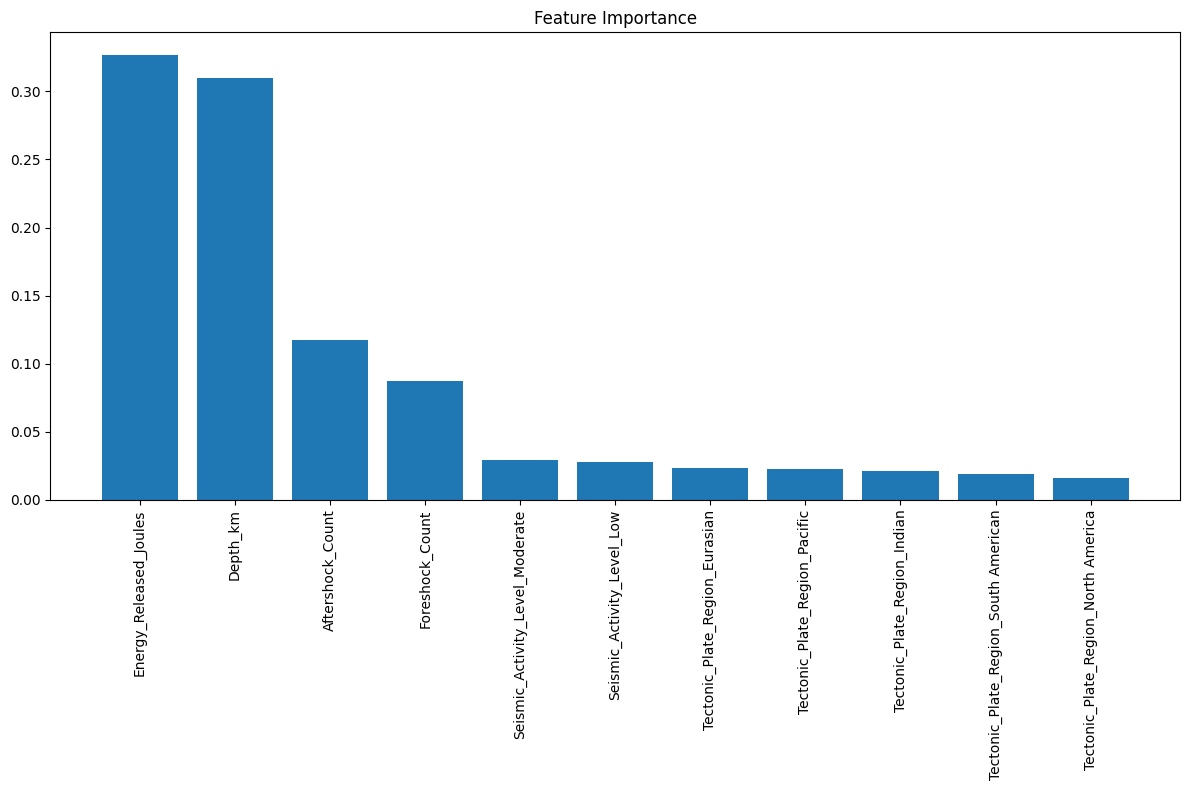

In [23]:
import matplotlib.pyplot as plt

# Feature importance
importances = rfr.feature_importances_
feature_names = X.columns

# Sort importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# Define top_n, for example, as the length of your feature importance array
top_n = len(importances)  # or any specific number

# Print lengths
print("Length of x values (range):", len(range(top_n)))
print("Length of height values (importances):", len(importances[:top_n]))

Length of x values (range): 11
Length of height values (importances): 11


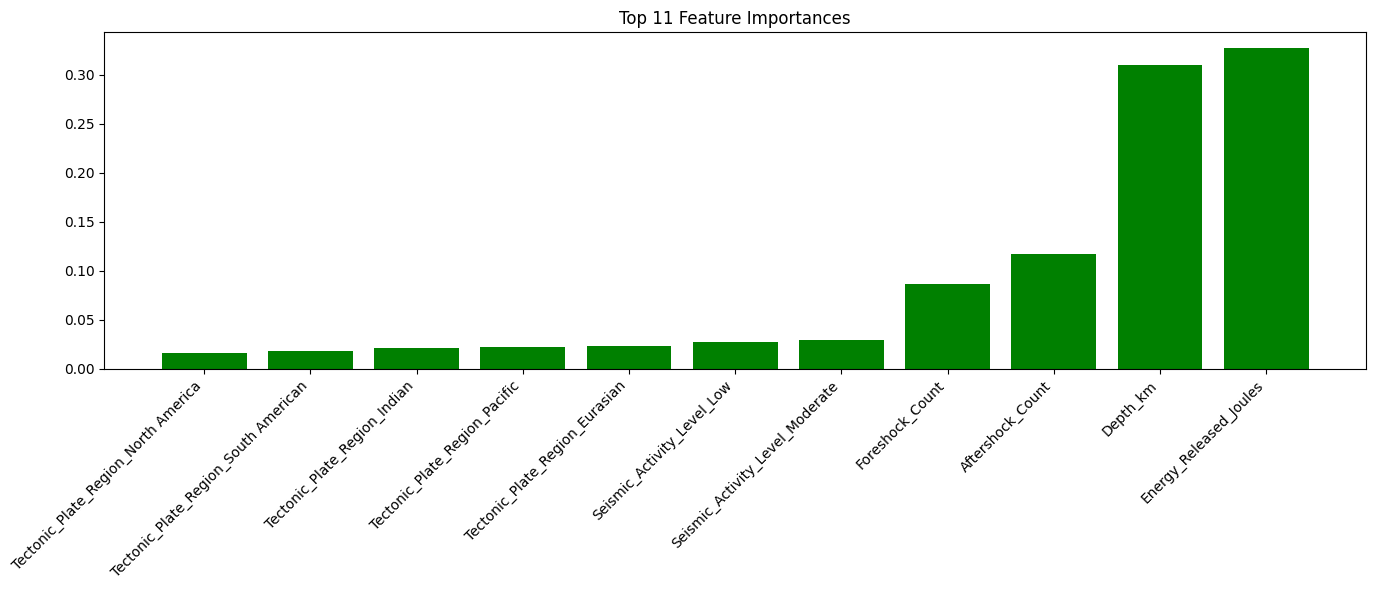

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and names
importances = rfr.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]  # descending order

# Adjust top_n to be the minimum of itself or the number of features
top_n = min(top_n, len(importances))

# Get the indices of the top features
top_indices = np.argsort(importances)[-top_n:]

# Plotting the feature importances
plt.figure(figsize=(14, 6))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[top_indices], color="g", align="center")
plt.xticks(range(top_n), [feature_names[i] for i in top_indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()


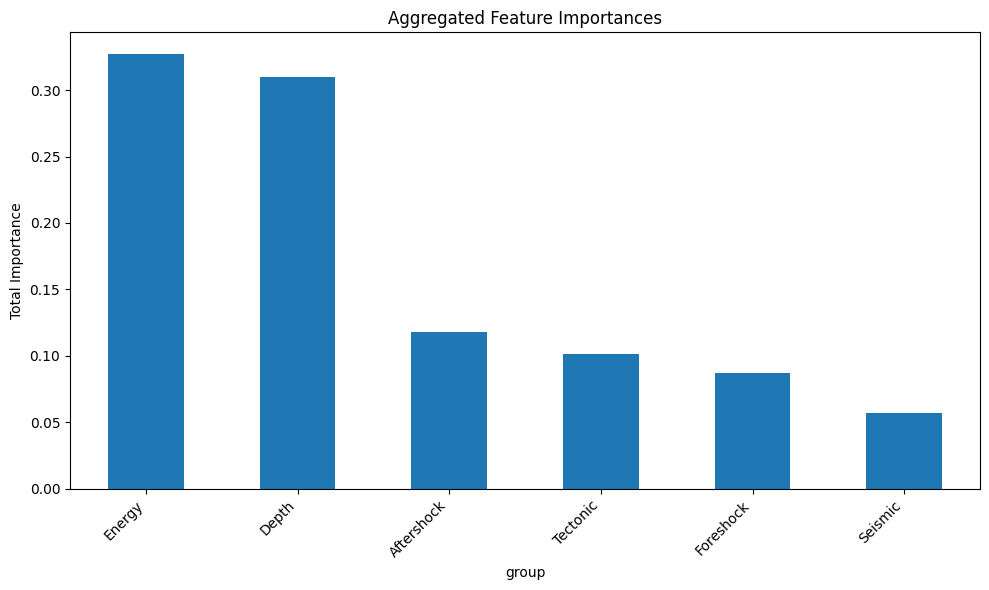

In [26]:
import pandas as pd

# Convert to DataFrame
fi_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Aggregate importance by feature prefix
fi_df['group'] = fi_df['feature'].apply(lambda x: x.split('_')[0] if '_' in x else x)
grouped_fi = fi_df.groupby('group')['importance'].sum().sort_values(ascending=False)

# Plot grouped importances
plt.figure(figsize=(10, 6))
grouped_fi.plot(kind='bar')
plt.title('Aggregated Feature Importances')
plt.ylabel('Total Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rfr = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [30]:
# Predict again
y_pred_best = best_rfr.predict(X_test)

# Metrics
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best MSE: {mse_best:.4f}")
print(f"Best RMSE: {rmse_best:.4f}")
print(f"Best R²: {r2_best:.4f}")

Best MSE: 6.7876
Best RMSE: 2.6053
Best R²: -0.0378


In [31]:
import joblib
# Save
joblib.dump(rfr, 'earthquake_magnitude_rfr.pkl')

['earthquake_magnitude_rfr.pkl']

In [ ]:
import pandas as pd
import joblib

# Load model and feature columns
model = joblib.load('earthquake_magnitude_rfr.pkl')
columns = joblib.load('model_columns.pkl')  # Load exact feature columns

# Take user input for numerical features
depth_km = float(input("Enter depth of earthquake (km): "))
foreshock_count = int(input("Enter foreshock count: "))
aftershock_count = int(input("Enter aftershock count: "))
energy_released = float(input("Enter energy released (joules): "))

# Prepare input DataFrame with all columns initialized to zero
input_df = pd.DataFrame(columns=columns)
input_df.loc[0] = 0  # Initialize first row to zeros

# Set numeric features
input_df.loc[0, 'Depth_km'] = depth_km
input_df.loc[0, 'Foreshock_Count'] = foreshock_count
input_df.loc[0, 'Aftershock_Count'] = aftershock_count
input_df.loc[0, 'Energy_Released_Joules'] = energy_released

# Predict
prediction = model.predict(input_df)[0]
print(f"\n✅ Predicted Earthquake Magnitude: {prediction:.2f}")

Enter depth of earthquake (km):  1000
Enter foreshock count:  1
Enter aftershock count:  2
Enter energy released (joules):  100000



✅ Predicted Earthquake Magnitude: 4.52
